In [2]:
with open(r"C:\Users\rabin\Desktop\IIT_ROPAR\MARCH_CLASS\the-time-machine.txt","r",encoding = "latin1") as f:
    lines = f.read()

In [3]:
import re
lines=lines.lower()

In [4]:
# remove the puncutation
lines=re.sub(r"[^a-z\s]","",lines)

In [5]:
len(lines)

174513

In [6]:
lines[-21:]

'the heart of man\n\n\n\n\n'

In [7]:
tokens=lines.split()

In [8]:
len(tokens)

32786

In [9]:
from collections import Counter
word_freq=Counter(tokens)
for i in word_freq.most_common(20):
    print(i)

('the', 2254)
('i', 1241)
('and', 1236)
('of', 1152)
('a', 804)
('to', 686)
('was', 550)
('in', 550)
('my', 440)
('that', 436)
('it', 416)
('had', 352)
('me', 281)
('as', 268)
('at', 243)
('for', 219)
('with', 216)
('but', 200)
('time', 197)
('were', 157)


In [10]:
# sort the tokens by frequency
sorted_word_freq = dict(sorted(word_freq.items(),key = lambda item : item[1],reverse = True))

In [11]:
#print(sorted_word_freq)

In [12]:
word=list(sorted_word_freq.keys())[:50]
freq=list(sorted_word_freq.values())[:50]

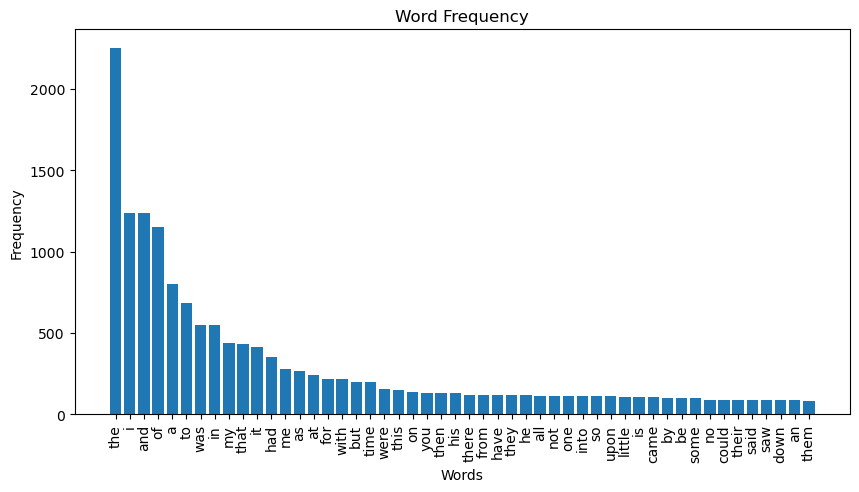

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(word,freq)
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency")
plt.show()

In [14]:
# n-grams
def generate_ngrams(tokens,n):
    return["".join(tokens[i:i+n] for i in range(len(tokens)- n+1))]

unigram=tokens
bi_gram=generate_ngrams(lines,2)
tri_gram=generate_ngrams(lines,3)

unigram_freq=Counter(unigram)
bi_gram_freq=Counter(bi_gram)
tri_gram_freq=Counter(tri_gram)

unigram_sorted=sorted(unigram)
bi_gram_sorted=sorted(bi_gram)
tri_gram_sorted=sorted(tri_gram)

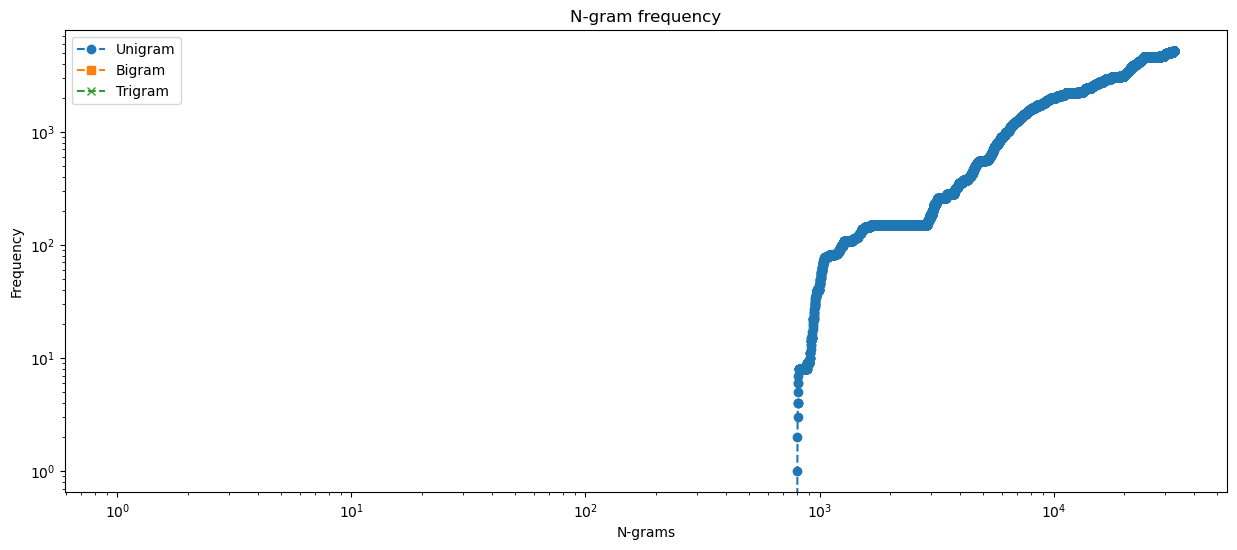

In [15]:
plt.figure(figsize=(15,6))
plt.plot(unigram_sorted, label="Unigram", marker='o', linestyle='--')
plt.plot(bi_gram_sorted, label="Bigram", marker='s', linestyle='--')
plt.plot(tri_gram_sorted, label="Trigram", marker='x', linestyle='--')

plt.yscale('log')
plt.xscale('log')

plt.xlabel("N-grams")
plt.ylabel("Frequency")
plt.title("N-gram frequency")
plt.legend()
plt.show()

In [16]:
# NLP PIPELINE

In [17]:
#Step 1:Loading the input, read the text file
with open(r"C:\Users\rabin\Desktop\IIT_ROPAR\MARCH_CLASS\the-time-machine.txt","r",encoding="latin1") as f:
    lines=f.read()

In [18]:
lines[:100]

'\nTHE TIME MACHInE\n\nBY H. G. WELLS\n\nPublished by Planet eBook. Visit the site to download free eBooks'

In [19]:
#Step 2: Tokenization
import nltk
nltk.download("punkt_tab")
from nltk.tokenize import word_tokenize, sent_tokenize

sentences=sent_tokenize(lines)
words=word_tokenize(lines)

print(len(sentences))
print(len(words))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rabin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


1809
37206


In [20]:
for i in range(3):
    print(sentences[i])
    print("--------------")


THE TIME MACHInE

BY H. G. WELLS

Published by Planet eBook.
--------------
Visit the site to download free eBooks of classic literature, books and novels.
--------------
This work is licensed under a Creative Commons Attribution- Noncommercial 3.0 United States License.
--------------


In [21]:
for i in range(20):
    print(words[i])
    print("-----------")

THE
-----------
TIME
-----------
MACHInE
-----------
BY
-----------
H.
-----------
G.
-----------
WELLS
-----------
Published
-----------
by
-----------
Planet
-----------
eBook
-----------
.
-----------
Visit
-----------
the
-----------
site
-----------
to
-----------
download
-----------
free
-----------
eBooks
-----------
of
-----------


In [22]:
#Step 3: Part of Speech Tagging
nltk.download("averaged_perceptron_tagger_eng")
nltk.pos_tag(words[10:25])

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\rabin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('eBook', 'NN'),
 ('.', '.'),
 ('Visit', 'VB'),
 ('the', 'DT'),
 ('site', 'NN'),
 ('to', 'TO'),
 ('download', 'VB'),
 ('free', 'JJ'),
 ('eBooks', 'NNS'),
 ('of', 'IN'),
 ('classic', 'JJ'),
 ('literature', 'NN'),
 (',', ','),
 ('books', 'NNS'),
 ('and', 'CC')]

In [23]:
# Step 4 : Text normalization
# 1 - Lower casing
# 2 - Stemming (Reduces the word to its root form, sometimes gives not a meaning ful word)
# 3 - Lemmatization : dictionary version of the word

In [24]:
lower_text=lines.lower()
print(lines[25:35])
print(lower_text[25:35])

G. WELLS


g. wells




In [25]:
#stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_words=[ps.stem(word) for word in words]
print(words[35:45])
print(stemmed_words[35:45])

['Attribution-', 'Noncommercial', '3.0', 'United', 'States', 'License', '.', 'I', 'THE', 'TIME']
['attribution-', 'noncommerci', '3.0', 'unit', 'state', 'licens', '.', 'i', 'the', 'time']


In [26]:
#Lemmetization
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()
lemmatized_words=[lemmatizer.lemmatize(word) for word in stemmed_words]

for i in range(len(stemmed_words)):
    if stemmed_words[i] !=lemmatized_words[i]:
        print(stemmed_words[i],lemmatized_words[i])
        

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rabin\AppData\Roaming\nltk_data...


us u
pass pas
us u
us u
as a
as a
us u
as a
as a
as a
as a
laps lap
as a
as a
as a
as a
us u
pass pas
as a
as a
feet foot
as a
us u
us u
us u
as a
us u
us u
as a
pass pas
as a
as a
us u
us u
pass pas
us u
sens sen
us u
us u
us u
us u
discuss discus
as a
as a
us u
as a
as a
as a
as a
as a
feet foot
as a
els el
curios curio
as a
us u
us u
pass pas
as a
us u
as a
us u
as a
as a
as a
as a
as a
pass pas
pass pas
curios curio
as a
as a
as a
els el
as a
as a
as a
as a
feet foot
feet foot
as a
eas ea
us u
loos loo
as a
as a
as a
as a
as a
pass pas
as a
as a
as a
as a
as a
as a
as a
children child
children child
as a
as a
as a
children child
children child
eas ea
as a
sens sen
as a
as a
as a
as a
as a
us u
us u
as a
as a
as a
as a
devis devi
as a
as a
curs cur
as a
as a
sens sen
as a
as a
es e
feet foot
as a
as a
sens sen
feet foot
as a
as a
as a
as a
feet foot
as a
as a
as a
as a
as a
loos loo
as a
as a
devis devi
as a
as a
as a
as a
as a
as a
as a
crematoria crematorium
crematoria crematorium

In [29]:
#Step 5: Stop words and punt removal
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words=set(stopwords.words("english"))
filtered_words=[word for word in lemmatized_words if word.lower() not in stop_words]

print(len(lemmatized_words))
print(len(filtered_words))

37206
21690


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rabin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
import numpy as np
np.random.seed(182)

x_t = np.random.randn(5000,5,10)
a_prev = np.random.randn(231,5)

parameters = {}
parameters["w1"] = np.random.randn(231,5000)
parameters["w2"] = np.random.randn(231,231)
parameters["b1"] = np.random.randn(231,1)
parameters["b2"] = np.random.randn(5000,1)
parameters["w3"] = np.random.randn(5000,231)


In [32]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x),axis = 0)

# this is for one time stamp
def rnn_cell_forward(xt,a_prev,parameters):
  w1 = parameters["w1"]
  w2 = parameters["w2"]
  b1 = parameters["b1"]
  b2 = parameters["b2"]
  w3 = parameters["w3"]

  print(xt.shape)
  print(a_prev.shape)


  a_next = np.tanh(np.dot(w1,xt) + np.dot(w2,a_prev) + b1)
  yt_pred = softmax(np.dot(w3,a_next) + b2)

  return a_next,yt_pred

In [33]:
# for all time stamps
def run_forward(x,a0,parameters):
  n_x ,m, t_x = x.shape # n_x : size of vocab, m : size of batch, t_x : max time stamp
  n_y , n_a = parameters["w3"].shape # n_y size of output, n_a : size of context(hidden state)

  a = np.zeros((n_a,m,t_x))
  y_pred = np.zeros((n_y,m,t_x))

  a_next = a0

  for i in range(t_x):
    xt = x[:,:,i]
    a_next,yt_pred = rnn_cell_forward(xt,a_next,parameters)

  return a_next,y_pred


In [34]:
a_tmp , y_pred = run_forward(x_t,a_prev,parameters)

(5000, 5)
(231, 5)
(5000, 5)
(231, 5)
(5000, 5)
(231, 5)
(5000, 5)
(231, 5)
(5000, 5)
(231, 5)
(5000, 5)
(231, 5)
(5000, 5)
(231, 5)
(5000, 5)
(231, 5)
(5000, 5)
(231, 5)
(5000, 5)
(231, 5)
